# TP 01 - 02

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Dataset

In [4]:

mnist = datasets.fetch_openml("mnist_784")
X = mnist.data[:50]
y = mnist.target[:50]



In [5]:
# mnist = pd.read_csv('./dataset/mnist_784.csv')
# mnist
# X = mnist.drop(labels='class', axis=1)
# y = mnist['class']

6


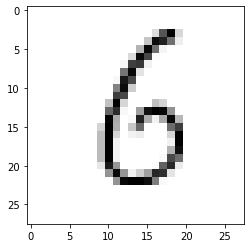

In [9]:
sample_idx = 18
print(y[sample_idx])
sample_image = X.iloc[sample_idx, :].values.reshape(28, 28)
plt.imshow(sample_image, cmap='binary')

In [10]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

# 1. Choisissons le clustering avec kmeans 
from sklearn import cluster
myclust = cluster.KMeans(n_clusters=10)
myclust.fit(X)

# 2. Visualisation
# On commence par réduire la dimension des données avec tSNE. On scale d’abord les données :
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Puis on applique tSNE aux données scalées :
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
X_trans = tsne.fit_transform(X_scaled)

# Puis on visualise, selon la méthode donnée dans le coup de pouce :
from matplotlib import pyplot as plt # Dans Jupyter : % pylab inline
plt.figure(figsize=(20,20))
for i in range(X.shape[0]): # pour chaque point
    plt.text(X_trans[i, 0], X_trans[i, 1], str('%d' % y[i]),
            color=plt.cm.Set2(myclust.labels_[i]/10.))

# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(X_trans[:, 0]), np.max(X_trans[:, 0])])
plt.ylim([np.min(X_trans[:, 1]), np.max(X_trans[:, 1])])

# On affiche l'image
plt.show()

# 3. Évaluation
# Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, myclust.labels_))

# Pour la comparaison aux étiquettes, je choisis l’indice de Rand ajusté :
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y, myclust.labels_))


/Users/vincentjuge/devel/vjuge/oc-iml/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/vincentjuge/devel/vjuge/oc-iml/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


TypeError: %d format: a number is required, not str

<Figure size 1440x1440 with 0 Axes>

In [11]:
myclust.score(X, y)

-85807954.63333334

## Model

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [13]:
# normalize input data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Dimension Reduction

In [14]:
from sklearn.decomposition import PCA
pca = PCA(0.70) #trying to achieve 95% of explained variance
pca.fit(X_train_std)

PCA(n_components=0.7)

In [15]:
pca.n_components_

13

In [16]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.11133701 0.10264995 0.08197807 0.06460134 0.05773965 0.04388861
 0.04214966 0.041089   0.03984773 0.03630858 0.03319733 0.02830234
 0.0266027 ]
0.7096919772772412


### Choose and train model

In [17]:
# use pca for our data sets

X_train = pca.transform(X_train_std)
X_test = pca.transform(X_test_std)


#### LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)

/Users/vincentjuge/devel/vjuge/oc-iml/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
logisticRegr.score(X_test, y_test)

0.3

#### KMeans

In [20]:
# avec kmeans
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=10, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km.fit(X_train, y_train)

KMeans(n_clusters=10, random_state=0)

In [21]:
km.score(X_test, y_test)

-1716.8947112022158

## Visualization

In [22]:
# avec t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=10)